In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
advanced = pd.read_csv("nba_2020_advanced.csv")
pergame = pd.read_csv("nba_2020_per_game.csv")
shooting = pd.read_csv("nba_2020_shooting.csv")

In [114]:
pergame

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [115]:
pergame = pergame.assign(FPPG=lambda x: (x['PTS'] + 1.5*x['TRB'] + x['3P'] + -2*x['TOV'] + 2*x['STL'] + 2*x['BLK']))

In [116]:
# FANTASY TOP 5 PLAYERS OF THE YEAR
pergame_sorted = pergame.sort_values('FPPG', ascending=False)
print("Top 5 Fantasy Basketball Players of 2019-20:\n", pergame_sorted['Player'][:5])

Top 5 Fantasy Basketball Players of 2019-20:
 12     Giannis Antetokounmpo
257             James Harden
581       Karl-Anthony Towns
162            Anthony Davis
184           Andre Drummond
Name: Player, dtype: object


In [117]:
# FANTASY TOP 5 BENCH PLAYER OF THE YEAR
pergame_sorted = pergame_sorted.assign(START=lambda x: (x['GS']/x['G']))
pergame_sorted

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
12,Giannis Antetokounmpo,PF,25,MIL,63,63,30.4,10.9,19.7,0.553,...,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,47.90,1.000000
257,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,...,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,45.00,1.000000
581,Karl-Anthony Towns,C,24,MIN,35,35,33.9,9.0,17.8,0.508,...,8.1,10.8,4.4,0.9,1.2,3.1,3.3,26.5,44.00,1.000000
162,Anthony Davis,PF,26,LAL,62,62,34.4,8.9,17.7,0.503,...,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1,43.85,1.000000
184,Andre Drummond,C,26,DET,49,48,33.8,7.3,13.9,0.530,...,11.2,15.8,2.8,2.0,1.7,3.6,3.6,17.8,41.70,0.979592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Daryl Macon,SG,24,MIA,4,0,3.5,0.3,0.8,0.333,...,0.0,0.0,0.3,0.0,0.0,0.5,0.3,0.8,0.10,0.000000
386,J.P. Macura,SG,24,CLE,1,0,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
454,Malik Newman,SG,22,CLE,1,0,4.0,0.0,2.0,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.00,0.000000
198,Jacob Evans,SG,22,MIN,2,0,2.0,0.0,0.5,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000


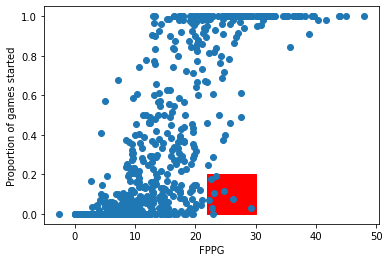

In [118]:
plt.scatter(pergame_sorted['FPPG'], pergame_sorted['START'], zorder=2)
plt.xlabel('FPPG')
plt.ylabel('Proportion of games started')
rectangle = plt.Rectangle((22,0), 8, 0.2, fc='red', ec="red")
plt.gca().add_patch(rectangle)

In [119]:
# As seen from the plot above, the highest performing fantasy bench players fall in the red rectangle, which 
# represents the 9 players that scored above 22 FPPG but started 20% or less of their games.
# Let's find them:
best_off_bench = pergame_sorted[pergame_sorted['FPPG'] > 22]
best_off_bench = best_off_bench[best_off_bench['START'] < 0.2]
best_off_bench

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
262,Montrezl Harrell,C,26,LAC,63,2,27.8,7.5,12.9,0.580,...,4.5,7.1,1.7,0.6,1.1,1.7,2.3,18.6,29.25,0.031746
52,Dāvis Bertāns,PF,27,WAS,54,4,29.3,4.9,11.3,0.434,...,3.9,4.5,1.7,0.7,0.6,1.1,2.6,15.4,26.25,0.074074
523,Mitchell Robinson,C,21,NYK,61,7,23.1,4.1,5.6,0.742,...,4.0,7.0,0.6,0.9,2.0,0.6,3.2,9.7,24.80,0.114754
642,Christian Wood,PF,24,DET,62,12,21.4,4.6,8.2,0.567,...,4.6,6.3,1.0,0.5,0.9,1.4,1.6,13.1,23.45,0.193548
338,DeAndre Jordan,C,31,BRK,56,6,22.0,3.4,5.1,0.666,...,7.5,10.0,1.9,0.3,0.9,1.3,2.0,8.3,23.10,0.107143
527,Terrence Ross,SG,28,ORL,69,0,27.4,4.9,12.3,0.403,...,3.0,3.2,1.2,1.1,0.3,1.0,1.6,14.7,22.90,0.000000
539,Dennis Schröder,PG,26,OKC,65,2,30.8,7.0,14.8,0.469,...,3.3,3.6,4.0,0.7,0.2,2.6,2.2,18.9,22.80,0.030769
449,Larry Nance Jr.,C,27,CLE,56,10,26.3,4.1,7.7,0.531,...,5.4,7.3,2.2,1.0,0.4,1.1,1.6,10.1,22.65,0.178571
129,Brandon Clarke,PF,23,MEM,58,4,22.4,5.1,8.3,0.618,...,4.4,5.9,1.4,0.6,0.8,0.9,1.7,12.1,22.35,0.068966


In [120]:
print("Top 9 Fantasy Basketball Players coming off the bench of 2019-20:\n", 
      best_off_bench['Player'])

Top 9 Fantasy Basketball Players coming off the bench of 2019-20:
 262     Montrezl Harrell
52         Dāvis Bertāns
523    Mitchell Robinson
642       Christian Wood
338       DeAndre Jordan
527        Terrence Ross
539      Dennis Schröder
449      Larry Nance Jr.
129       Brandon Clarke
Name: Player, dtype: object


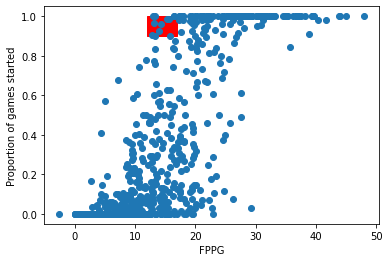

In [121]:
# FANTASY WORST STARTERS
plt.scatter(pergame_sorted['FPPG'], pergame_sorted['START'], zorder=2)
plt.xlabel('FPPG')
plt.ylabel('Proportion of games started')
rectangle = plt.Rectangle((12,0.9), 5, 0.1, fc='red', ec="red")
plt.gca().add_patch(rectangle)

In [122]:
# As seen from the plot above, the lowest performing fantasy starting players fall in the red rectangle, which 
# represents the 10 players that scored below 18 FPPG but started 90% or more of their games.
# Let's find them:
worst_starters = pergame_sorted[pergame_sorted['FPPG'] < 17]
worst_starters = worst_starters[worst_starters['START'] > 0.9]
worst_starters

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
240,Danny Green,SG,32,LAL,68,68,24.8,2.9,7.0,0.416,...,2.6,3.3,1.3,1.3,0.5,0.9,2.0,8.0,16.55,1.000000
138,Zach Collins,PF,22,POR,11,11,26.4,2.9,6.2,0.471,...,4.0,6.3,1.5,0.5,0.5,1.3,3.3,7.0,16.45,1.000000
209,Bryn Forbes,SG,26,SAS,63,62,25.1,3.8,9.2,0.417,...,1.8,2.0,1.7,0.5,0.0,0.9,1.8,11.2,15.70,0.984127
537,Tomáš Satoranský,PG,28,CHI,65,64,28.9,3.6,8.5,0.430,...,2.7,3.9,5.4,1.2,0.1,2.0,2.1,9.9,15.35,0.984615
374,Meyers Leonard,C,27,MIA,51,49,20.3,2.3,4.6,0.509,...,4.5,5.1,1.1,0.3,0.3,0.8,2.1,6.1,14.35,0.960784
569,Isaiah Thomas,PG,30,WAS,40,37,23.1,4.4,10.7,0.408,...,1.4,1.7,3.7,0.3,0.2,1.9,1.9,12.2,13.95,0.925000
222,Darius Garland,PG,20,CLE,59,59,30.9,4.7,11.8,0.401,...,1.4,1.9,3.9,0.7,0.1,2.6,1.6,12.3,13.35,1.000000
556,Tony Snell,SF,28,DET,59,57,27.8,2.9,6.5,0.445,...,1.7,1.9,2.2,0.5,0.3,0.5,1.7,8.0,13.15,0.966102
399,Wesley Matthews,SG,33,MIL,67,67,24.4,2.5,6.3,0.396,...,2.1,2.5,1.4,0.6,0.1,0.6,1.5,7.4,12.95,1.000000
226,Taj Gibson,C,34,NYK,62,56,16.5,2.7,4.6,0.584,...,2.5,4.3,0.8,0.4,0.5,0.8,2.0,6.1,12.85,0.903226


In [123]:
print("Top 10 worst fantasy starters of 2019-20:\n", 
      worst_starters['Player'])

Top 10 worst fantasy starters of 2019-20:
 240         Danny Green
138        Zach Collins
209         Bryn Forbes
537    Tomáš Satoranský
374      Meyers Leonard
569       Isaiah Thomas
222      Darius Garland
556          Tony Snell
399     Wesley Matthews
226          Taj Gibson
Name: Player, dtype: object
